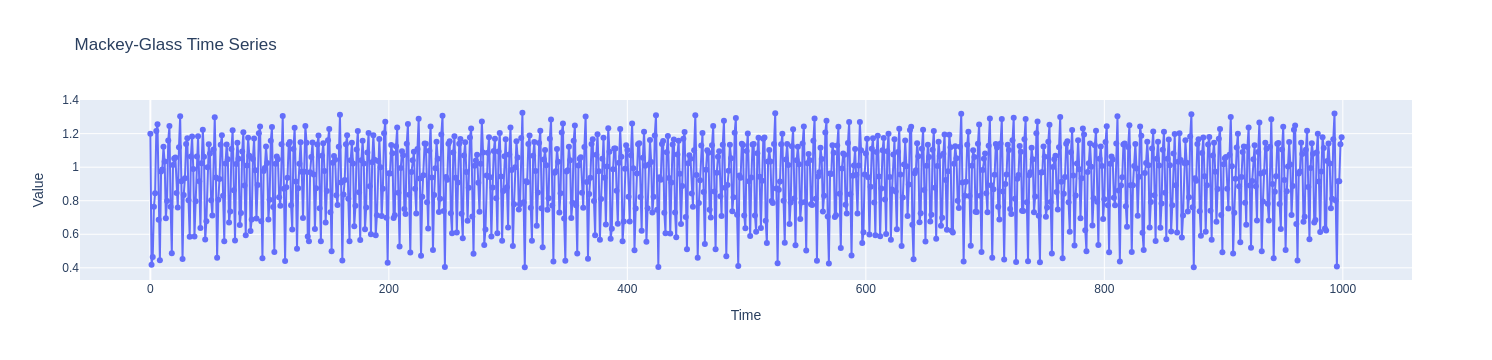

Epoch [10/100], Loss: 0.9909
Epoch [20/100], Loss: 0.9680
Epoch [30/100], Loss: 0.9228
Epoch [40/100], Loss: 0.7955
Epoch [50/100], Loss: 0.5570
Epoch [60/100], Loss: 0.3219
Epoch [70/100], Loss: 0.2075
Epoch [80/100], Loss: 0.1508
Epoch [90/100], Loss: 0.1141
Epoch [100/100], Loss: 0.0926
Test Loss: 0.0948


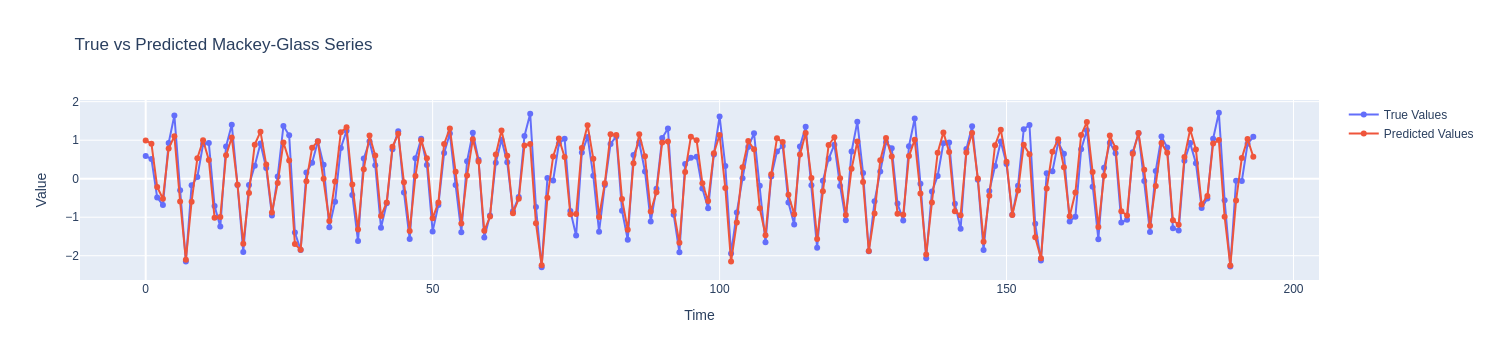

In [12]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import plotly.graph_objects as go  # Interactive plotting library

# 1. Generate Mackey-Glass time series (noiseless)
def generate_mackey_glass(T=1000, tau=17, beta=0.2, gamma=0.1, x0=1.2):
    """
    Generate Mackey-Glass time series based on the differential equation.
    """
    series = np.zeros(T)
    series[0] = x0
    for t in range(1, T):
        series[t] = series[t-1] + beta * series[t - tau] / (1 + series[t - tau]**10) - gamma * series[t-1]
    return series

# Parameters for the Mackey-Glass series
T = 10000  # Number of data points
tau = 17  # Delay term
beta = 0.2
gamma = 0.1

# Generate time series
series = generate_mackey_glass(T=T, tau=tau, beta=beta, gamma=gamma)
sample_gaps = 10
series_diluted = series[::sample_gaps]

# Plot the generated Mackey-Glass series
fig = go.Figure()
fig.add_trace(go.Scatter(y=series_diluted, mode='lines+markers', name='Mackey-Glass'))
fig.update_layout(title="Mackey-Glass Time Series", xaxis_title="Time", yaxis_title="Value")
fig.show()

# 2. Prepare the data for training: We will use past 10 time steps to predict the next time step
def create_dataset(series, time_step=10):
    X, y = [], []
    for i in range(len(series) - time_step):
        X.append(series[i:i + time_step])
        y.append(series[i + time_step])
    return np.array(X), np.array(y)

# Create dataset
time_step = 30
X, y = create_dataset(series_diluted, time_step)

# Normalize the data
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.Tensor(X_train).unsqueeze(-1)  # Shape: [batch_size, time_step, 1]
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test).unsqueeze(-1)
y_test = torch.Tensor(y_test)

# 3. Define a simple neural network (LSTM model)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.fc = nn.Linear(50, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Only take the output of the last time step
        return out

# Instantiate the model
model = SimpleNN()

# 4. Train the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions.squeeze(), y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plot the results interactively
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test.numpy(), mode='lines+markers', name='True Values'))
fig.add_trace(go.Scatter(y=predictions.squeeze().numpy(), mode='lines+markers', name='Predicted Values'))
fig.update_layout(title="True vs Predicted Mackey-Glass Series", xaxis_title="Time", yaxis_title="Value")
fig.show()


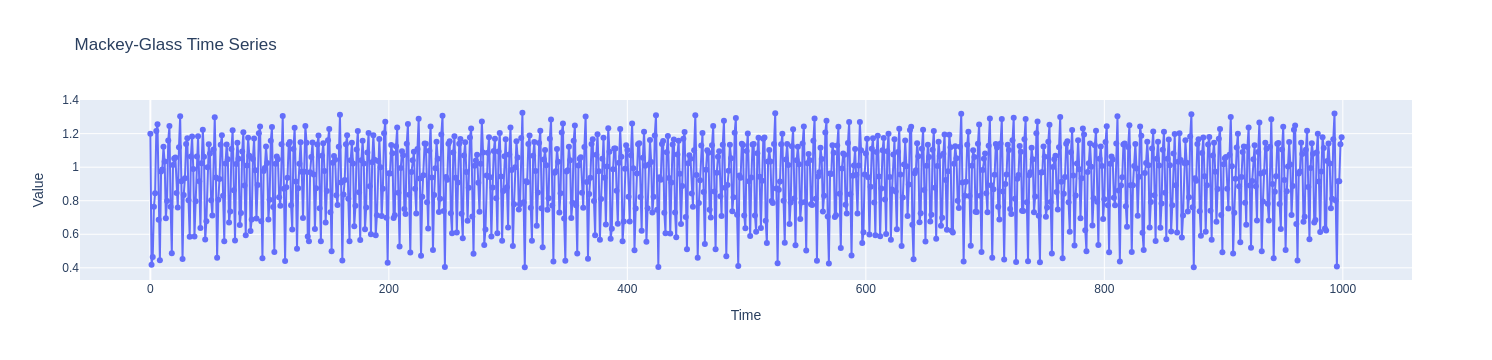

Epoch [10/1000], Train Loss: 0.9807, Val Loss: 1.0090
Epoch [20/1000], Train Loss: 0.9558, Val Loss: 0.9821
Epoch [30/1000], Train Loss: 0.9033, Val Loss: 0.9219
Epoch [40/1000], Train Loss: 0.7450, Val Loss: 0.7391
Epoch [50/1000], Train Loss: 0.5375, Val Loss: 0.5498
Epoch [60/1000], Train Loss: 0.3409, Val Loss: 0.3733
Epoch [70/1000], Train Loss: 0.2337, Val Loss: 0.2973
Epoch [80/1000], Train Loss: 0.1772, Val Loss: 0.2072
Epoch [90/1000], Train Loss: 0.1406, Val Loss: 0.1598
Epoch [100/1000], Train Loss: 0.1129, Val Loss: 0.1313
Epoch [110/1000], Train Loss: 0.0935, Val Loss: 0.1018
Epoch [120/1000], Train Loss: 0.0764, Val Loss: 0.0858
Epoch [130/1000], Train Loss: 0.0643, Val Loss: 0.0664
Epoch [140/1000], Train Loss: 0.0523, Val Loss: 0.0551
Epoch [150/1000], Train Loss: 0.0435, Val Loss: 0.0439
Epoch [160/1000], Train Loss: 0.0382, Val Loss: 0.0372
Epoch [170/1000], Train Loss: 0.0360, Val Loss: 0.0374
Epoch [180/1000], Train Loss: 0.0301, Val Loss: 0.0290
Epoch [190/1000], T

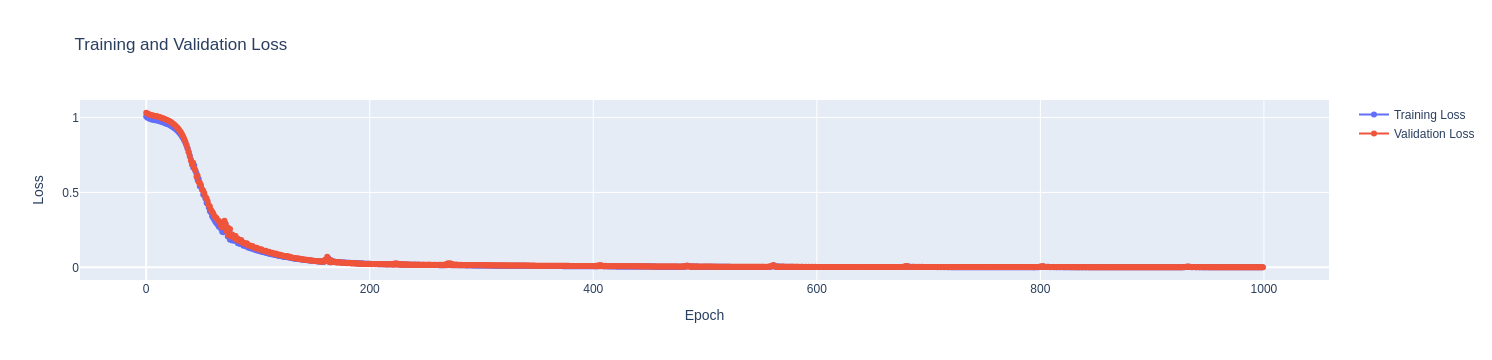

Test Loss: 0.0009


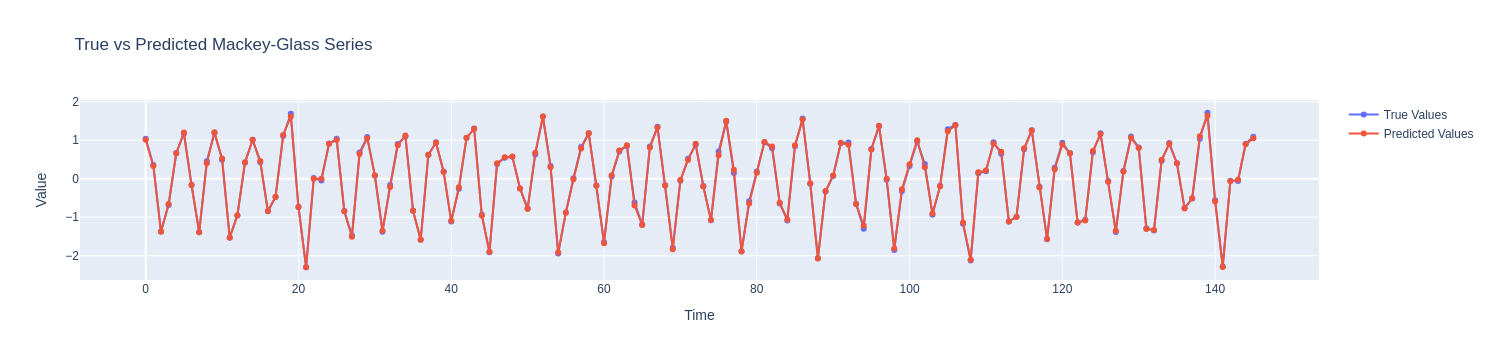

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import plotly.graph_objects as go  # Interactive plotting library

# 1. Generate Mackey-Glass time series (noiseless)
def generate_mackey_glass(T=1000, tau=17, beta=0.2, gamma=0.1, x0=1.2):
    """
    Generate Mackey-Glass time series based on the differential equation.
    """
    series = np.zeros(T)
    series[0] = x0
    for t in range(1, T):
        series[t] = series[t-1] + beta * series[t - tau] / (1 + series[t - tau]**10) - gamma * series[t-1]
    return series

# Parameters for the Mackey-Glass series
T = 10000  # Number of data points
tau = 17  # Delay term
beta = 0.2
gamma = 0.1

# Generate time series
series = generate_mackey_glass(T=T, tau=tau, beta=beta, gamma=gamma)
sample_gaps = 10
series_diluted = series[::sample_gaps]

# Plot the generated Mackey-Glass series
fig = go.Figure()
fig.add_trace(go.Scatter(y=series_diluted, mode='lines+markers', name='Mackey-Glass'))
fig.update_layout(title="Mackey-Glass Time Series", xaxis_title="Time", yaxis_title="Value")
fig.show()

# 2. Prepare the data for training: We will use past 10 time steps to predict the next time step
def create_dataset(series, time_step=10):
    X, y = [], []
    for i in range(len(series) - time_step):
        X.append(series[i:i + time_step])
        y.append(series[i + time_step])
    return np.array(X), np.array(y)

# Create dataset
time_step = 30
X, y = create_dataset(series_diluted, time_step)

# Normalize the data
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Split into training, validation, and testing sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Convert to PyTorch tensors
X_train = torch.Tensor(X_train).unsqueeze(-1)  # Shape: [batch_size, time_step, 1]
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val).unsqueeze(-1)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test).unsqueeze(-1)
y_test = torch.Tensor(y_test)

# 3. Define a simple neural network (LSTM model)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.fc = nn.Linear(50, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Only take the output of the last time step
        return out

# Instantiate the model
model = SimpleNN()

# 4. Train the model with early stopping
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
patience = num_epochs * 0.1
best_val_loss = float('inf')
early_stop_counter = 0
train_losses, val_losses = [], []

best_model = None  # Store the best model

for epoch in range(num_epochs):
    # Training
    model.train()
    outputs = model(X_train)
    train_loss = criterion(outputs.squeeze(), y_train)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), y_val)
    
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    
    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        early_stop_counter = 0
        best_model = model.state_dict()  # Save the best model
    else:
        early_stop_counter += 1
    
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1}")
        break
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Load the best model
model.load_state_dict(best_model)

# Plot training and validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(y=train_losses, mode='lines+markers', name='Training Loss'))
fig.add_trace(go.Scatter(y=val_losses, mode='lines+markers', name='Validation Loss'))
fig.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
fig.show()

# 5. Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions.squeeze(), y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plot the results interactively
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test.numpy(), mode='lines+markers', name='True Values'))
fig.add_trace(go.Scatter(y=predictions.squeeze().numpy(), mode='lines+markers', name='Predicted Values'))
fig.update_layout(title="True vs Predicted Mackey-Glass Series", xaxis_title="Time", yaxis_title="Value")
fig.show()


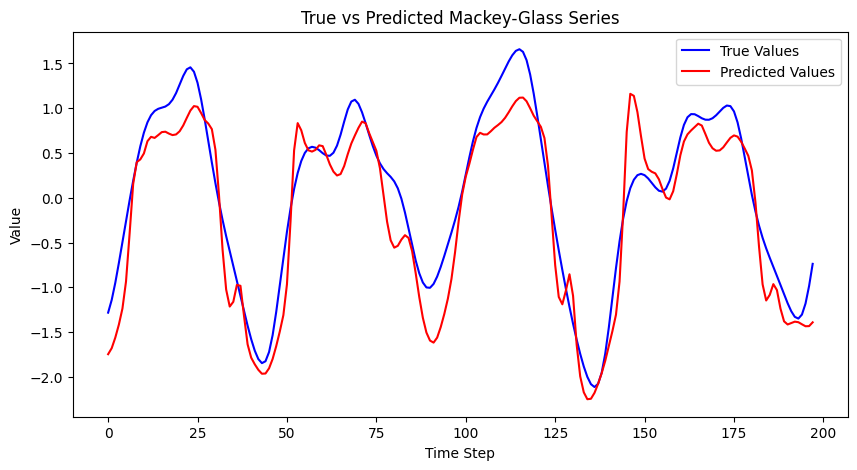

In [26]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.numpy(), label='True Values', color='blue')  # True values
plt.plot(predictions.squeeze().numpy(), label='Predicted Values', color='red')  # Predicted values
plt.legend()
plt.title('True vs Predicted Mackey-Glass Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()
